#### https://online.stat.psu.edu/stat501/lesson/6

#### We will focus on "general linear F-test" and "sequential sums of squares"

Heart attacks in Rabbits: when heart muscle is deprived of oxygen, the tissue dies and leads to a heart attack. Cooling the heart reduces the size of the heart attack. It is not known whether cooling is only effective if it takes place **before** the blood flow to the heart becomes restricted.

To investigate it, we conduct an experiment on 32 rabbits that were subjected to a heart attack. There are 3 experimental groups: early cooling, late cooling, no cooling

The researchers measureed the size of damaged (infarcted) area; also note down the size of hearts

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
from matplotlib import pyplot as plt
filedir = 'STAT501_Lesson06'
os.listdir(filedir)

['allentest.txt',
 '.DS_Store',
 'coolhearts.txt',
 'alcoholarm.txt',
 'Physical.txt',
 'iqsize.txt',
 'cooling_setting.png',
 'peru.txt',
 'sugarbeets_new.txt',
 'cooling_setting_explain.png']

In [2]:
df = pd.read_table(os.path.join(filedir, 'coolhearts.txt'))
df

,Inf,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0
5,0.311,0.82,3,0,0
6,0.418,0.95,3,0,0
7,0.480,1.06,3,0,0
8,0.687,1.20,3,0,0
9,0.847,1.47,3,0,0


In [3]:
Image(url=os.path.join(filedir, "cooling_setting.png"), width=600, height=600)

In [4]:
Image(url=os.path.join(filedir, "cooling_setting_explain.png"), width=600, height=600)

In [5]:
y = df['Inf']
X = df[['Area','X2','X3']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Inf   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           2.36e-06
Time:                        12:04:45   Log-Likelihood:                 19.760
No. Observations:                  32   AIC:                            -31.52
Df Residuals:                      28   BIC:                            -25.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1345      0.104     -1.293      0.206      -0.348       0.079
Area           0.6127      0.107      5.723      0.000       0.393       0.832
X2            -0.2435      0.062     -3.909      0.001      -0.371      -0.116
X3            -0.0657      0.065     -1.009      0.322      -0.199       0.068
==============================================================================
Omnibus:                        5.165   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.657
Skew:                           0.591   Prob(JB):                        0.161
Kurtosis:                       4.159   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can ask different questions. Each question can be translated into a statistical procedure.
<ol>
    <li>Is a regression model containing at least one predictor useful</li>
    <li>Is the damaged area related to the size of heart</li>
    <li>Does cooling have any effect?</li>
</ol>

#### 1. Is this model containing anything useful?

$$
H_0: \beta_1 = \beta_2 = \beta_3 = 0
$$

#### 2. Is the damaged area related to the size of heart

$$
H_0: \beta_1 = 0
$$

#### 3. Does cooling have any effect

$$
H_0: \beta_2 = \beta_3 = 0
$$

#### The first question can be answered by F-test; the second can be answered by a t-test; how about the third one?

#### The General Linear F-test

<ol>
<li>Define a larger full model</li>
<li>Define a smaller reduced model</li>
<li>Use an F-statistic to decide, compare SSE(R) vs. SSE(F)</li>
</ol>

$$
F^* = \frac{\frac{SSE(R) - SSE(F)}{df_R - df_F}}{\frac{SSE(F)}{df_F}}
$$

If SSE(F) and SSE(R) differ greatly, it means the additional parameters in the full model substantially reduce the variation. It makes sense to go with the full model.


$H_0$: go with the reduced model -> the additional features' slopes equal to 0<br>

$H_A$: go with the full model


#### Let's apply the general linear F-test to the 3 reseach questions above

In [6]:
df = df.rename(columns={'Inf':'y'})

In [7]:
df['intercept'] = 1
model = ols('y ~ intercept + Area + X2 + X3', data=df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
intercept,1.0,0.064210,0.064210,3.299412,0.080026
Area,1.0,0.580754,0.580754,29.841870,0.000008
X2,1.0,0.298620,0.298620,15.344490,0.000524
X3,1.0,0.018497,0.018497,0.950483,0.337945
Residual,28.0,0.544910,0.019461,NaN,NaN


In [8]:
def run_general_linear_Ftest(model_R, model_F, q=1-0.05):
    anova_R = sm.stats.anova_lm(model_R)
    anova_F = sm.stats.anova_lm(model_F)
    SSE_R, df_R = anova_R.loc['Residual',['sum_sq','df']]
    SSE_F, df_F = anova_F.loc['Residual',['sum_sq','df']]
    dfn = df_R - df_F
    dfd = df_F
    Fvalue = ((SSE_R - SSE_F) / dfn) / (SSE_F / dfd)
    pvalue = scipy.stats.f.sf(x=Fvalue, dfn=dfn, dfd=dfd)
    return Fvalue, dfn, dfd, pvalue

#### 1. Is this model containing anything useful?

$
H_0: y_i = \beta_0 + \epsilon_i
$<br>
$
H_A: y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i
$

In [9]:
model_R = ols('y ~ intercept', data=df).fit()
model_F = ols('y ~ intercept + Area + X2 + X3', data=df).fit()
run_general_linear_Ftest(model_R, model_F)

(16.4306306956002, 3.0, 28.0, 2.3634700103476835e-06)

#### 2. Is the damaged area related to the size of heart

$
H_0: y_i = \beta_0 + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i
$<br>
$
H_A: y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i
$

In [10]:
model_R = ols('y ~ intercept + X2 + X3', data=df).fit()
model_F = ols('y ~ intercept + Area + X2 + X3', data=df).fit()
run_general_linear_Ftest(model_R, model_F)

(32.75360056375819, 1.0, 28.0, 3.8654412037492455e-06)

#### 3. Does cooling have any effect

$
H_0: y_i = \beta_0 + \beta_1 x_{i1} + \epsilon_i
$<br>
$
H_A: y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \epsilon_i
$

In [11]:
model_R = ols('y ~ intercept + Area', data=df).fit()
model_F = ols('y ~ intercept + Area + X2 + X3', data=df).fit()
run_general_linear_Ftest(model_R, model_F)

(8.590176103218052, 2.0, 28.0, 0.0012328716567308682)

#### Sequential Sums of Squares: SSE(R) - SSE(F)

$SSE(x_1)$ denotes the error sum of squares when $x_1$ is the only predictor in the model <br>
$SSR(x_1, x_2)$ denotes the regression sum of squares when $x_1$ and $x_2$ are both in the model <br>
$SSR(x_1|x_2)$ denotes the improvement by adding x2 to a model that already contains the predictor $x_1$ <br>
$SSR(x_3|x_1) = SSR(x_1,x_3) - SSR(x_1)$

$$
F^* = \frac{\frac{SSE(R) - SSE(F)}{df_R - df_F}}{\frac{SSE(F)}{df_F}}
$$

#### Partial Regression

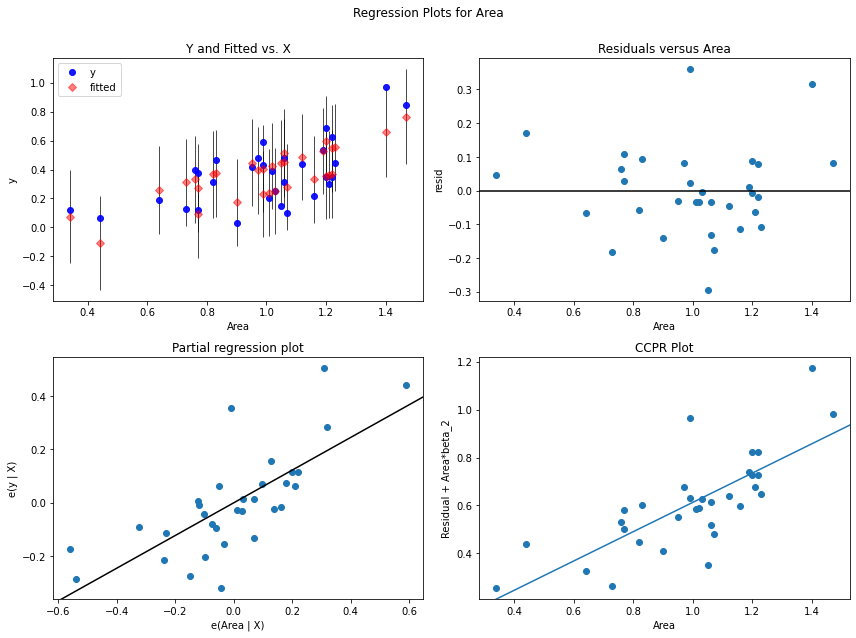

In [12]:
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'Area', fig)

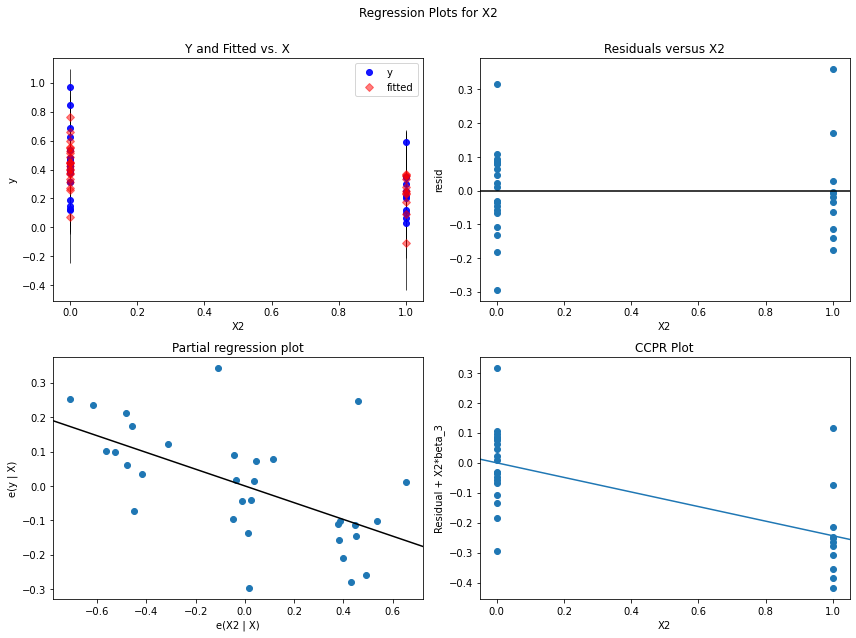

In [13]:
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'X2', fig)

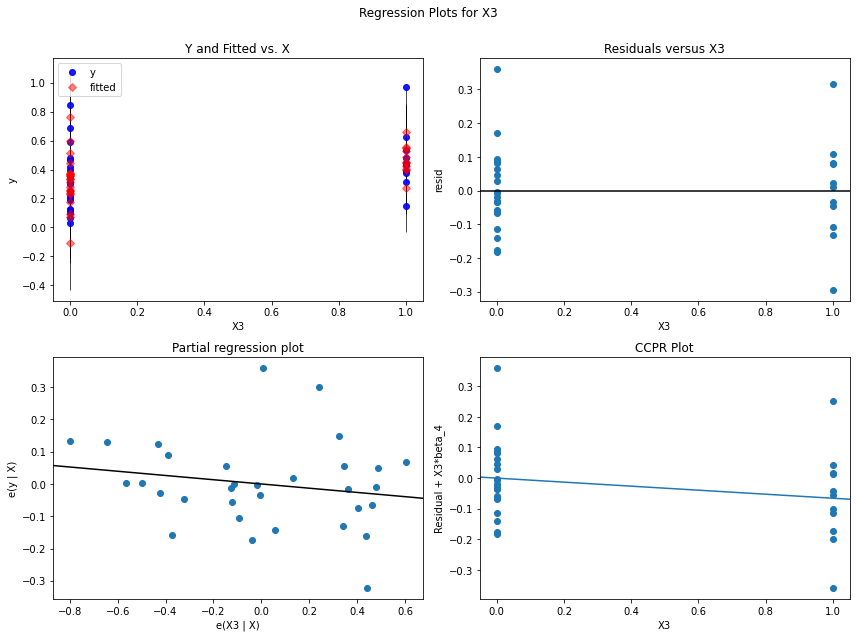

In [14]:
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'X3', fig)

#### Partial R2

the partial R2 of adding $X_2$ and $X_3$ to the predictor Area is

$$
\frac{SSR(X_2,X_3|Area)}{SSE(Area)}
$$

$$
\frac{SSR(X_2,X_3,Area) - SSR(Area))}{SSE(Area)}
$$

$$
\frac{SSE(Area) - SSE(X_2,X_3,Area))}{SSE(Area)}
$$

In general,

$$
\frac{SSE(R) - SSE(F))}{SSE(R)}
$$